In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates


pd.set_option('display.max_columns', 5)
pd.read_csv("./files/model.csv")

,time_stamp,outdoor_temperature,...,fcst_air_power,power_after
0,2022/7/1 0:00,25.681,...,0.773,0.726KW
1,2022/7/1 0:05,25.651,...,0.732,0.728KW
2,2022/7/1 0:10,25.621,...,0.747,0.726KW
3,2022/7/1 0:15,25.591,...,0.745,0.727
4,2022/7/1 0:20,25.561,...,0.748,0.722
...,...,...,...,...,...
283,2022/8/3 23:35,26.111,...,0.773,0.723
284,2022/8/4 23:40,26.090,...,0.770,0.723
285,2022/8/5 23:45,26.069,...,0.735,0.725
286,2022/8/6 23:50,26.048,...,0.757,0.724


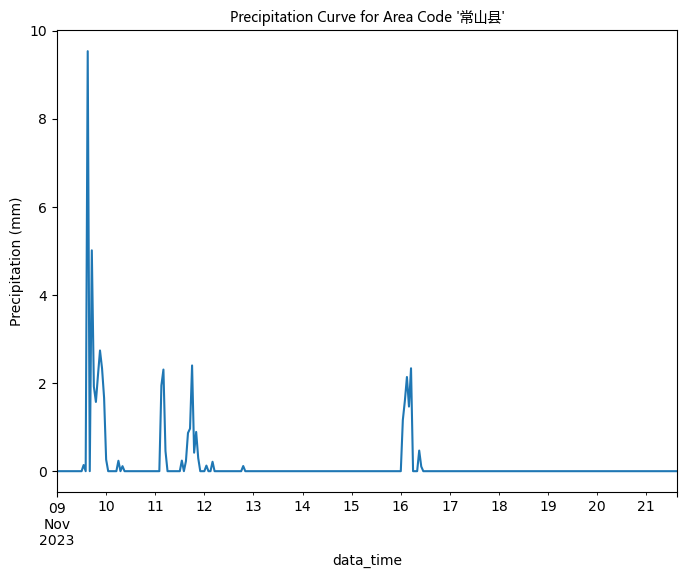

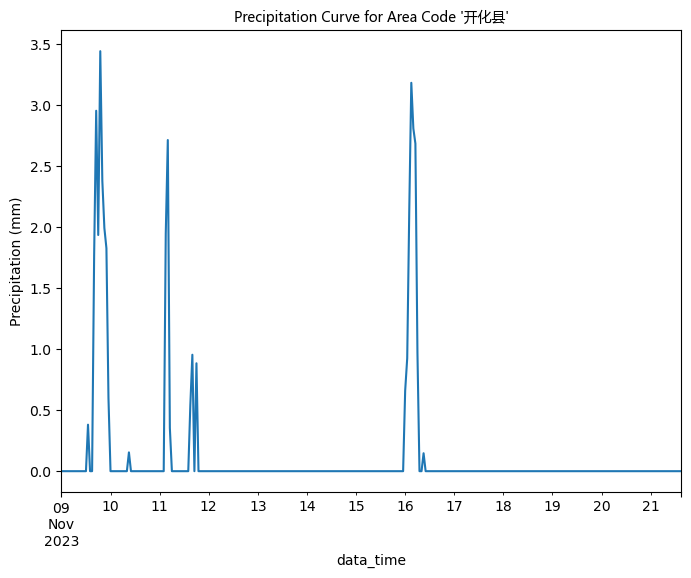

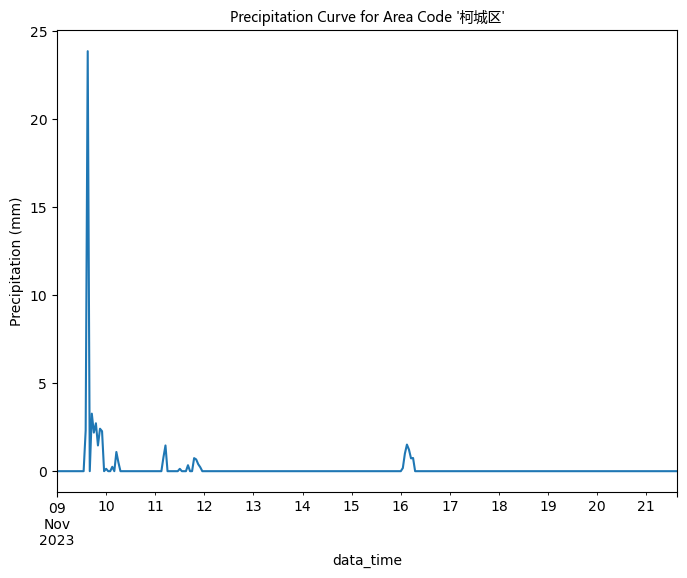

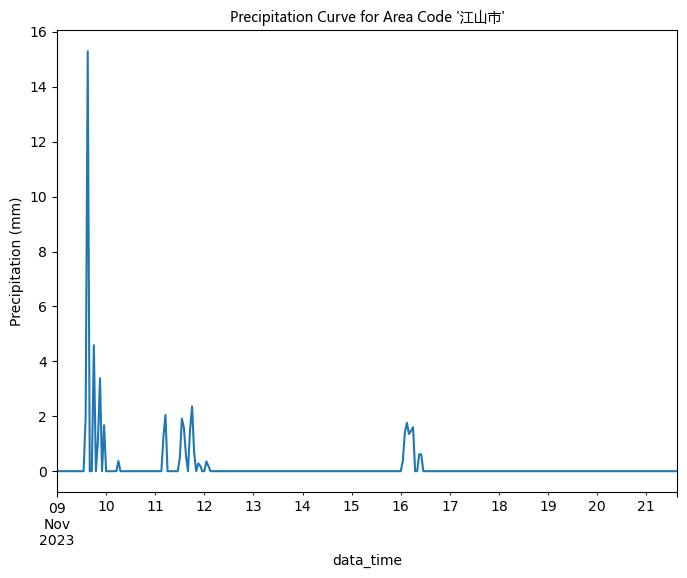

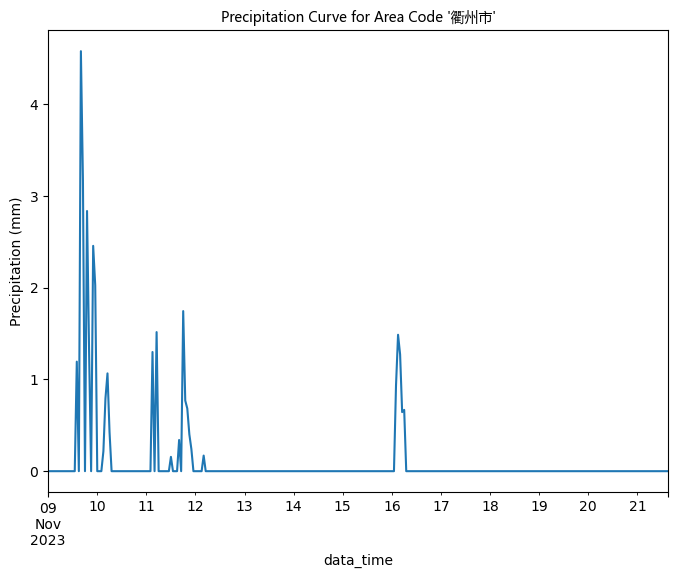

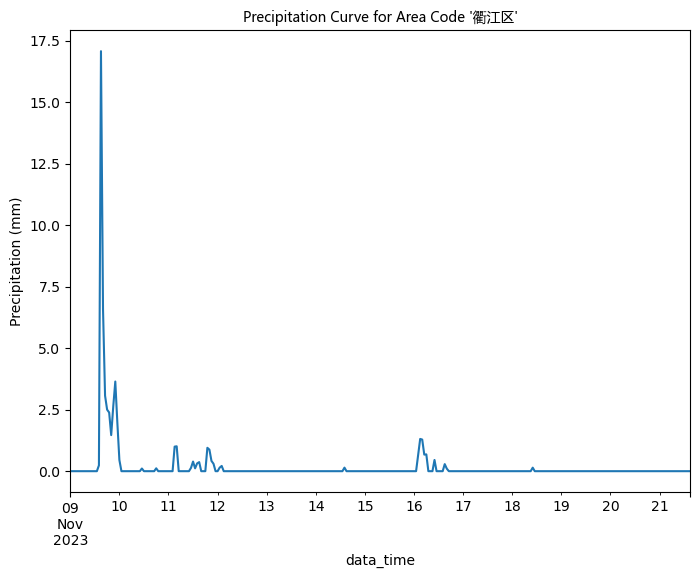

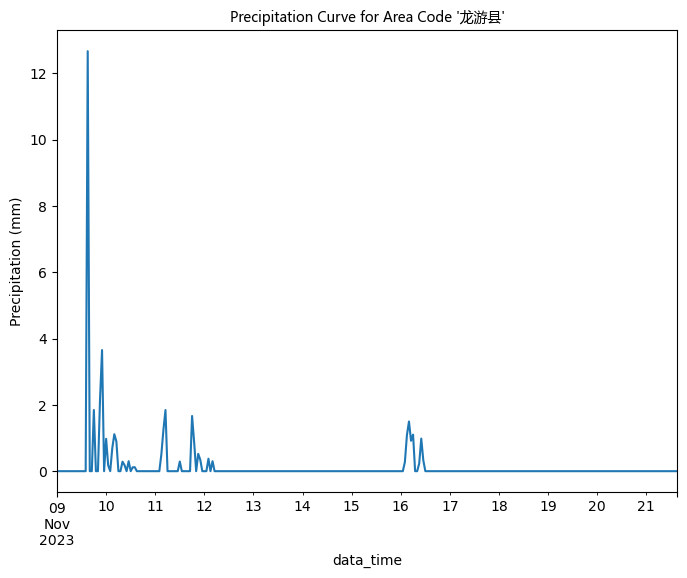

In [26]:
weather = pd.read_csv("./files/weather/GRID_AREA_WEATHER_REALDATA.csv")
weather.fillna(value=0, inplace=True)
weather['data_time'] = pd.to_datetime(weather['data_time'])

my_font=font_manager.FontProperties(fname="C:\Windows\Fonts\msyh.ttc")

df = weather.loc[:, ['area_name','data_time','rain', 'temperature']]

for area_name, group in df.groupby('area_name'):
    plt.figure(figsize=(8,6))
    group.set_index('data_time')['rain'].plot()
    plt.title(f"Precipitation Curve for Area Code {area_name}", fontproperties=my_font)
    plt.xlabel('data_time')
    plt.ylabel('Precipitation (mm)')
    plt.show()

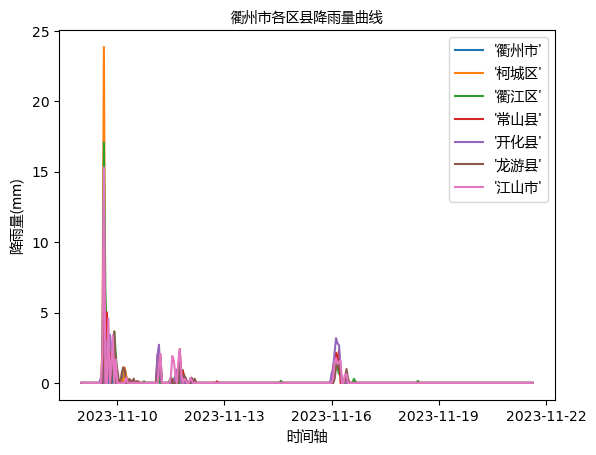

In [27]:
unique_areas = df['area_name'].unique()
for area in unique_areas:
    # 筛选出特定区域的数据
    area_df = df[df['area_name'] == area]
    plt.plot(area_df['data_time'], area_df['rain'], label=area)
    
# 添加图例
plt.legend(prop=my_font)

plt.title(f"衢州市各区县降雨量曲线", fontproperties=my_font)
plt.xlabel('时间轴', fontproperties=my_font)
plt.ylabel('降雨量(mm)', fontproperties=my_font)
# 设置x轴时间格式的中文字体，并倾斜45度
# plt.xticks(fontproperties=my_font, rotation=45)
plt.gca().xaxis.set_major_locator(MultipleLocator(3)) # x轴间隔设置
# date_format = mdates.DateFormatter('%Y年%m月%d日')
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format) # 格式化xlabel


plt.show()

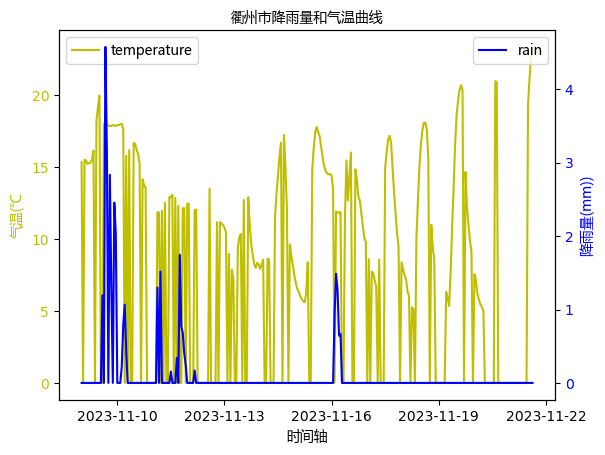

In [90]:
my_font=font_manager.FontProperties(fname="C:\Windows\Fonts\msyh.ttc")
weather = pd.read_csv("./files/weather/GRID_AREA_WEATHER_REALDATA.csv")
weather.fillna(value=0, inplace=True)
weather['data_time'] = pd.to_datetime(weather['data_time'])
# weather['area_name'].replace('\'衢州市\'','衢州市', inplace=True)
# weather.loc[:,'area_name'] = weather['area_name'].str.replace('\'', '')
# weather['area_name'] = weather['area_name'].apply(lambda x : x.replace("'", "") if isinstance(x, str) else x)
# weather.loc[:, ['area_name', 'area_code']] = weather.applymap(lambda x : x.replace("'", "") if isinstance(x, str) else x)
weather.loc[:, ['area_name', 'area_code']] = weather.map(lambda x : x.replace("'", "") if isinstance(x, str) else x)

# pd.set_option('display.max_columns', None)

df = weather.loc[:, ['area_name','data_time','rain', 'temperature']]

df = df[df['area_name'].isin(["衢州市"])]
# 模糊匹配
# df[df['area_name'].str.contains('衢州市')]
# print(df)

fig, ax1 = plt.subplots()

ax1.plot(df['data_time'], df['temperature'], label='temperature', color='y')
ax1.set_xlabel('时间轴', fontproperties=my_font)
ax1.set_ylabel('气温(℃)', fontproperties=my_font, color='y')
ax1.tick_params(axis='y', labelcolor='y')

# 创建第二个y轴
ax2 = ax1.twinx()

ax2.plot(df['data_time'], df['rain'], label='rain', color='b')
# 标签文字颜色
ax2.set_ylabel('降雨量(mm))', fontproperties=my_font, color='b')
# y轴刻度颜色
ax2.tick_params(axis='y', labelcolor='b')

# 添加图例
ax1.legend(prop=my_font, loc='upper left')
ax2.legend(prop=my_font, loc='upper right')

plt.title(f"衢州市降雨量和气温曲线", fontproperties=my_font)
plt.gca().xaxis.set_major_locator(MultipleLocator(3)) # x轴间隔设置

plt.show()

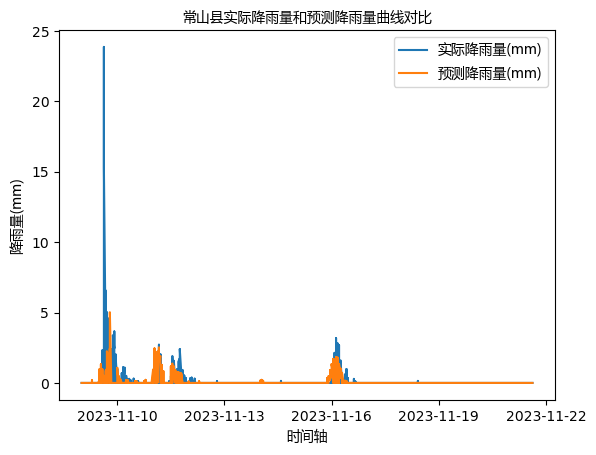

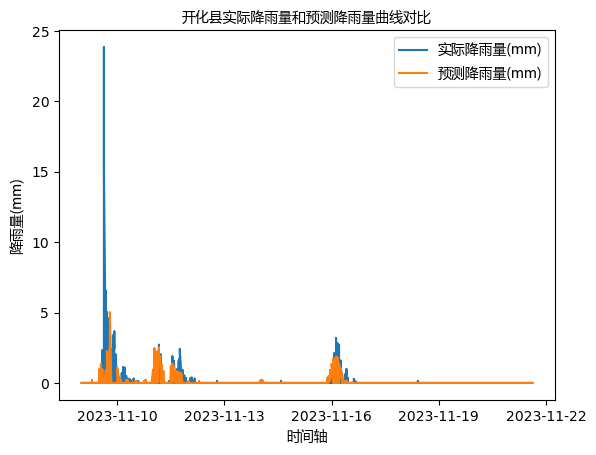

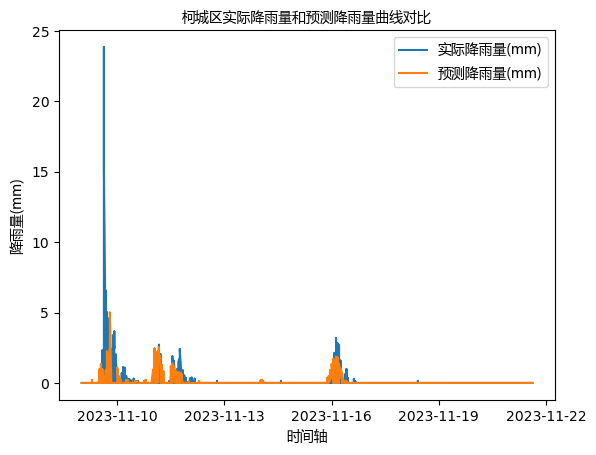

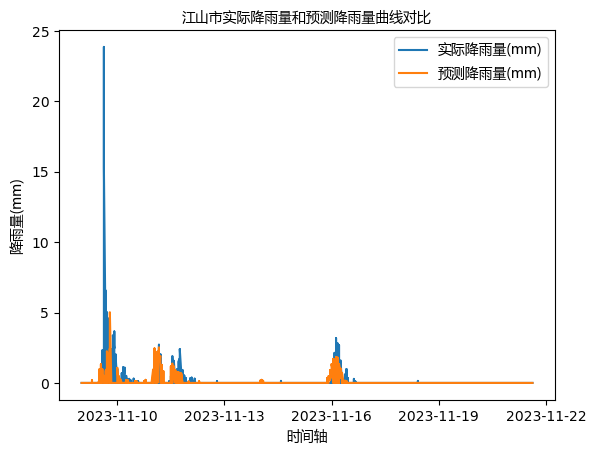

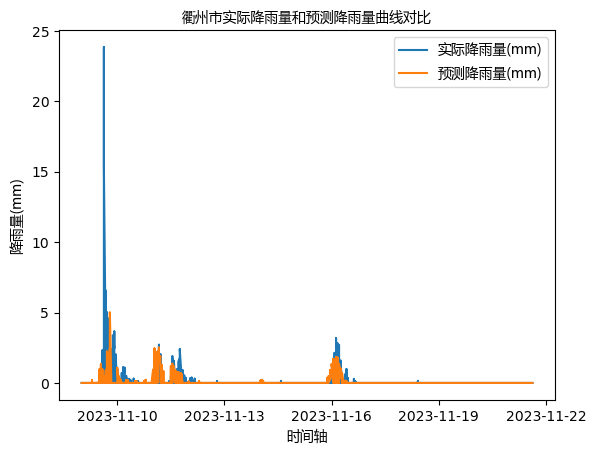

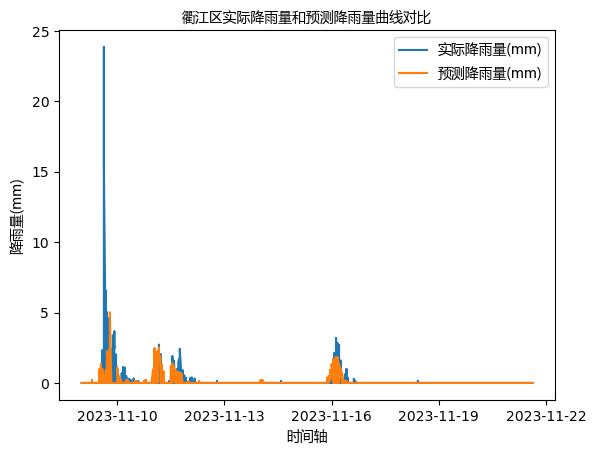

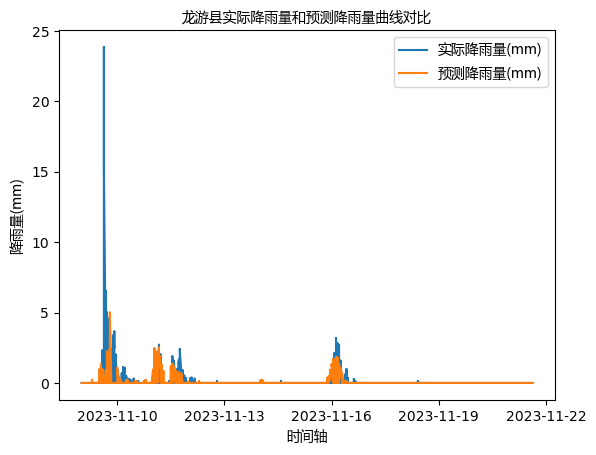

In [109]:
my_font=font_manager.FontProperties(fname="C:\Windows\Fonts\msyh.ttc")
weather_real = pd.read_csv("./files/weather/GRID_AREA_WEATHER_REALDATA.csv")
weather_forecast = pd.read_csv("./files/weather/GRID_AREA_WEATHER_THREEDAYS_HOUR.csv")

# 根据区域编码和时间对两个DF进行jion
merge_df = pd.merge(weather_real,weather_forecast, on=['area_name', 'data_time'])

merge_df = merge_df[['area_name', 'data_time', 'rain_x', 'rain_y']].rename(columns={'rain_x':'rain_real', 'rain_y': 'rain_forecast'})

merge_df.fillna(value=0, inplace=True)
merge_df['data_time'] = pd.to_datetime(merge_df['data_time'])
merge_df.loc[:, ['area_name']] = merge_df.map(lambda x : x.replace("'", "") if isinstance(x, str) else x)

# color枚举：'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
for area,group in merge_df.groupby('area_name'):
    plt.plot(merge_df['data_time'], merge_df['rain_real'], label='实际降雨量(mm)')
    plt.plot(merge_df['data_time'], merge_df['rain_forecast'], label='预测降雨量(mm)')

    plt.title(f"{area}实际降雨量和预测降雨量曲线对比", fontproperties=my_font)
    plt.xlabel('时间轴', fontproperties=my_font)
    plt.ylabel('降雨量(mm)', fontproperties=my_font)

    plt.gca().xaxis.set_major_locator(MultipleLocator(3)) # x轴间隔设置
    plt.legend(prop=my_font)
    plt.show()


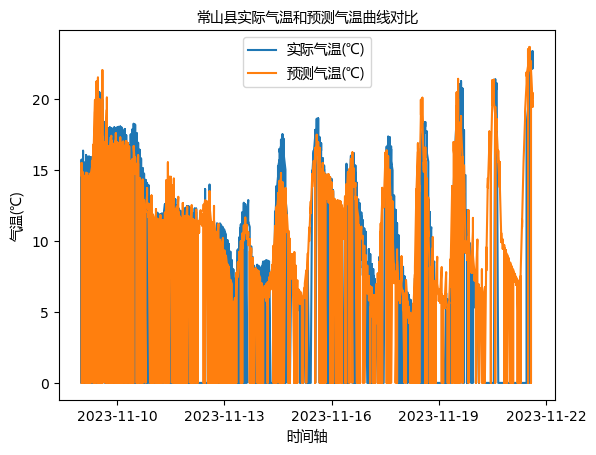

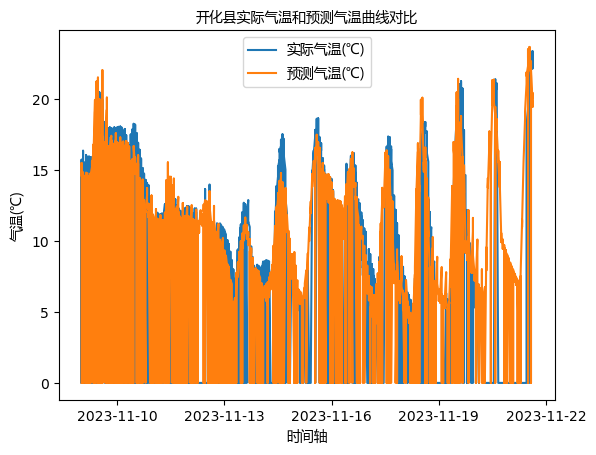

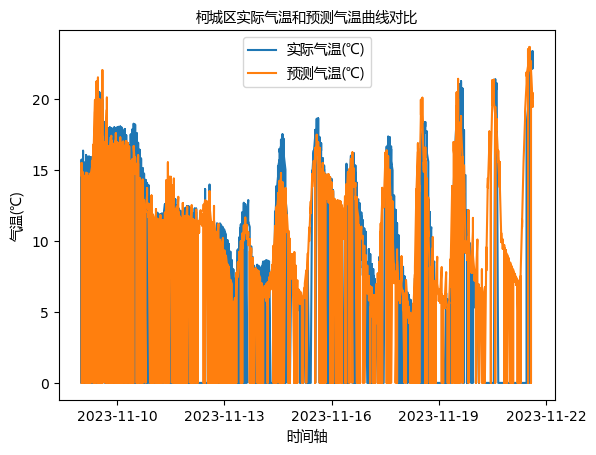

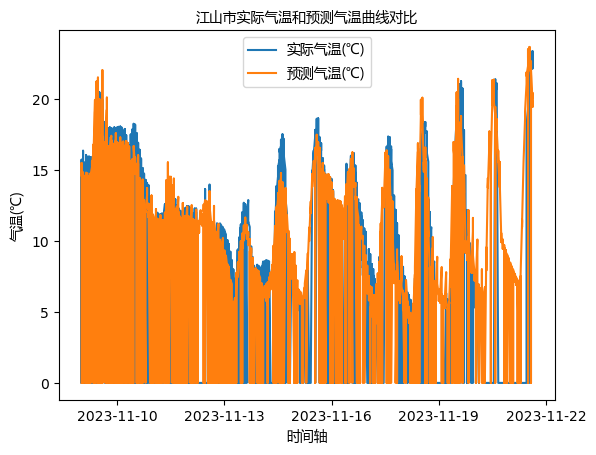

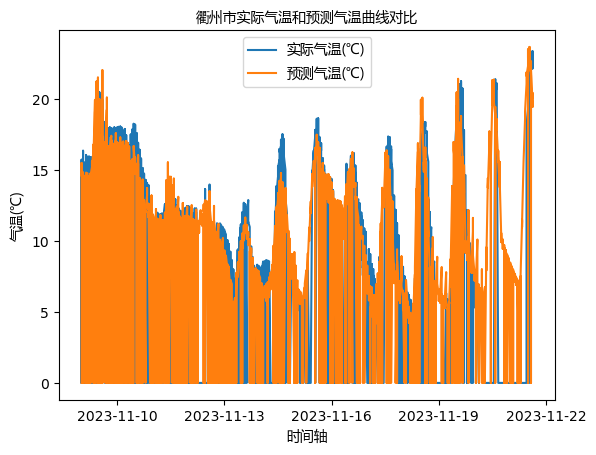

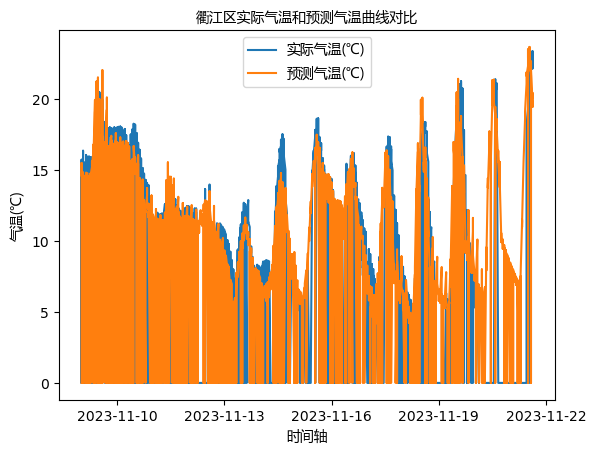

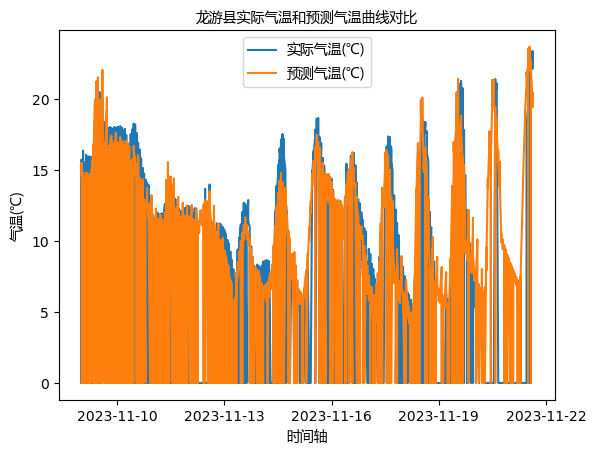

In [111]:
my_font=font_manager.FontProperties(fname="C:\Windows\Fonts\msyh.ttc")
weather_real = pd.read_csv("./files/weather/GRID_AREA_WEATHER_REALDATA.csv")
weather_forecast = pd.read_csv("./files/weather/GRID_AREA_WEATHER_THREEDAYS_HOUR.csv")

# 根据区域编码和时间对两个DF进行jion
merge_df = pd.merge(weather_real,weather_forecast, on=['area_name', 'data_time'])

merge_df = merge_df[['area_name', 'data_time', 'temperature_x', 'temperature_y']].rename(columns={'temperature_x':'temperature_real', 'temperature_y': 'temperature_forecast'})

merge_df.fillna(value=0, inplace=True)
merge_df['data_time'] = pd.to_datetime(merge_df['data_time'])
merge_df.loc[:, ['area_name']] = merge_df.map(lambda x : x.replace("'", "") if isinstance(x, str) else x)

# color枚举：'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
for area,group in merge_df.groupby('area_name'):
    plt.plot(merge_df['data_time'], merge_df['temperature_real'], label='实际气温(℃)')
    plt.plot(merge_df['data_time'], merge_df['temperature_forecast'], label='预测气温(℃)')

    plt.title(f"{area}实际气温和预测气温曲线对比", fontproperties=my_font)
    plt.xlabel('时间轴', fontproperties=my_font)
    plt.ylabel('气温(℃)', fontproperties=my_font)

    plt.gca().xaxis.set_major_locator(MultipleLocator(3)) # x轴间隔设置
    plt.legend(prop=my_font)
    plt.show()


Time: 0 s, Ti: 23.4 °C, Tm: 22.6 °C
Time: 60 s, Ti: 62.905508998873856 °C, Tm: 32.805279007493795 °C
Time: 120 s, Ti: 113.6038374081838 °C, Tm: 58.292078615063126 °C
Time: 180 s, Ti: 193.78181627916751 °C, Tm: 101.88106064967154 °C
Time: 240 s, Ti: 324.6155138893822 °C, Tm: 173.67843088352993 °C
Time: 300 s, Ti: 538.8660935749893 °C, Tm: 291.4932570267114 °C
Time: 360 s, Ti: 889.9282977319813 °C, Tm: 484.4373252250426 °C
Time: 420 s, Ti: 1465.3841836708166 °C, Tm: 800.9599453050758 °C
Time: 480 s, Ti: 2409.0594388851378 °C, Tm: 1319.5135753924014 °C
Time: 540 s, Ti: 3952.810015412365 °C, Tm: 2168.5137506355745 °C
Time: 600 s, Ti: 6488.126514095509 °C, Tm: 3562.614391136638 °C
Time: 660 s, Ti: 10639.063836897585 °C, Tm: 5843.240152731925 °C
Time: 720 s, Ti: 17436.85213383152 °C, Tm: 9583.232699039756 °C
Time: 780 s, Ti: 28603.828120323575 °C, Tm: 15720.049032820025 °C
Time: 840 s, Ti: 46861.301335436234 °C, Tm: 25751.905218001433 °C
Time: 900 s, Ti: 76798.95828916944 °C, Tm: 42230.36222

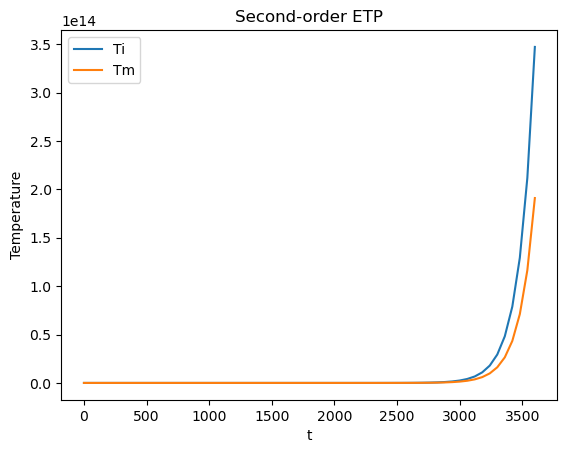

Data saved to indoor_temperature_output.xlsx successfully.


In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp


def indoor_temp_ode(t, y, To, Q, R1, R2, Ca, Cm):
    Ti = y[0]
    Tm = y[1]

    dTidt = (Tm / (R2 * Ca)) - (Ti / (Ca * R1)) + (To / (R1 * Ca)) + Q / Ca

    dTmdt = (Ti / (R2 * Cm)) - (Tm / (R2 * Cm))

    # 室内温度微分方程

    return [dTidt, dTmdt]


# 初始值
Ti0 = 23.4
# 初始室内空气温度
Tm0 = 22.6
# 初始室内固体温度
To = 29
# 室外温度
Q = 0

# 制冷/制热量（和室内温度关系）
R1 = 12.163

# 空气热损失系数倒数
R2 = 3.273

# 固体热损失系数倒数
Ca = 10.416

# 空气比热容（J/kg）
Cm = 30.381

# 固体比热容(J/kg)

t_span = [0, 3600]  # 时间范围
dt = 60  # 时间步长为1s

# 初值
y0 = [Ti0, Tm0]
t_eval = np.arange(t_span[0], t_span[1] + dt, dt)  # 求解时的时间点

# 求解微分方程
sol = solve_ivp(indoor_temp_ode, t_span, y0, t_eval=t_eval, args=(To, Q, R1, R2, Ca, Cm))

# 输出每秒的室内空气温度和室内固体温度
for i in range(len(sol.t)):
    print(f"Time: {sol.t[i]} s, Ti: {sol.y[0][i]} °C, Tm: {sol.y[1][i]} °C")

# 绘制图像
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label='Ti')
ax.plot(sol.t, sol.y[1], label='Tm')
ax.set_xlabel('t')
ax.set_ylabel('Temperature')
ax.set_title('Second-order ETP')
ax.legend()
plt.show()

# 输出每秒的室内空气温度和室内固体温度
data = {
    'Time (s)': sol.t,
    'Ti (°C)': sol.y[0],
    'Tm (°C)': sol.y[1]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 将数据保存为Excel文件
output_filename = 'indoor_temperature_output.xlsx'
# df.to_excel(output_filename, index=False)

print(f"Data saved to {output_filename} successfully.")
